In [1]:
from train_base import ParquetDataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/work/gallim/mambaforge/envs/FFF-minimal/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
cond_columns = ["probe_pt", "probe_eta", "probe_phi", "probe_fixedGridRhoAll"]
columns = ["probe_r9", "probe_s4", "probe_sieie", "probe_sieip"]

all_columns = cond_columns + columns

nevs = 100000
fl = "/work/gallim/devel/CQRRelatedStudies/NormalizingFlow/preprocess/preprocessed/data_eb_train.parquet"

scalers = ["minmax", "standard", "maxabs", "robust", "poweryeo", "qtgaus"]

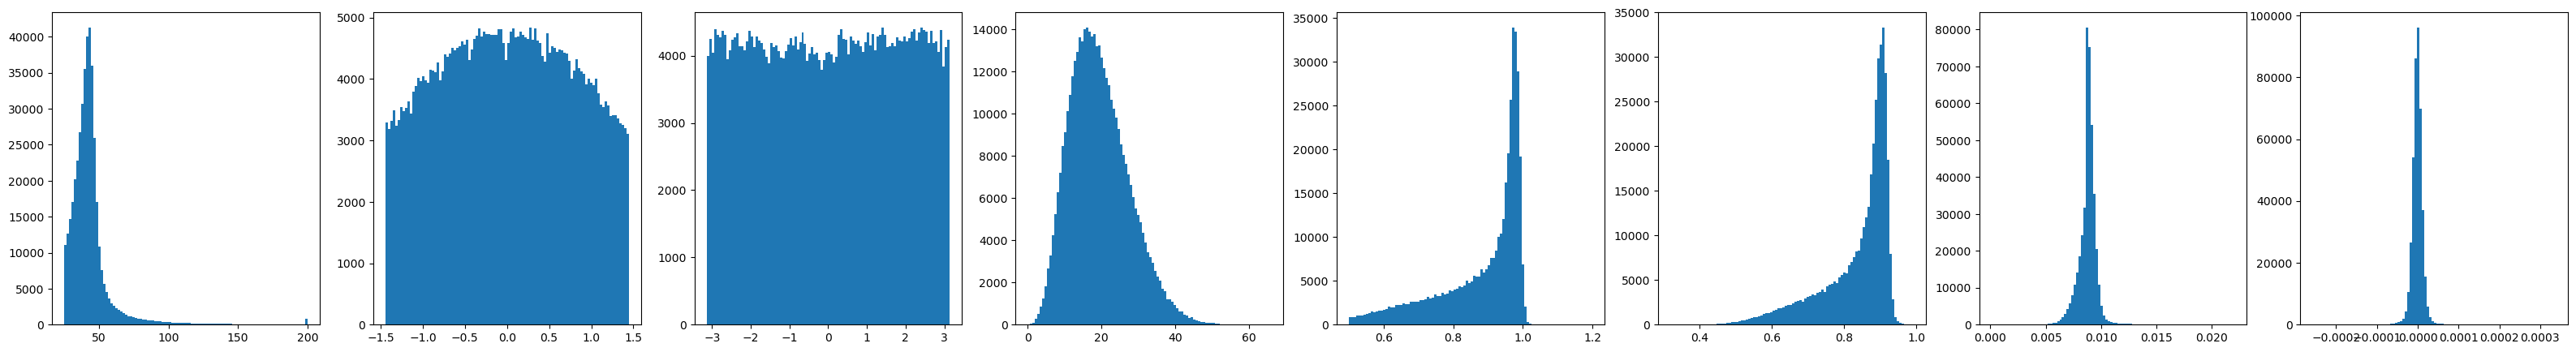

In [3]:
original_df = pd.read_parquet(fl, columns=all_columns)
#original_df = original_df.iloc[:nevs]
original_df["probe_pt"] = original_df["probe_pt"].clip(upper=200)

fig, axs = plt.subplots(1, len(all_columns), figsize=(5*(len(all_columns)), 5))
for i, col in enumerate(all_columns):
    axs[i].hist(original_df[col], bins=100)

In [4]:
len(original_df)

417832

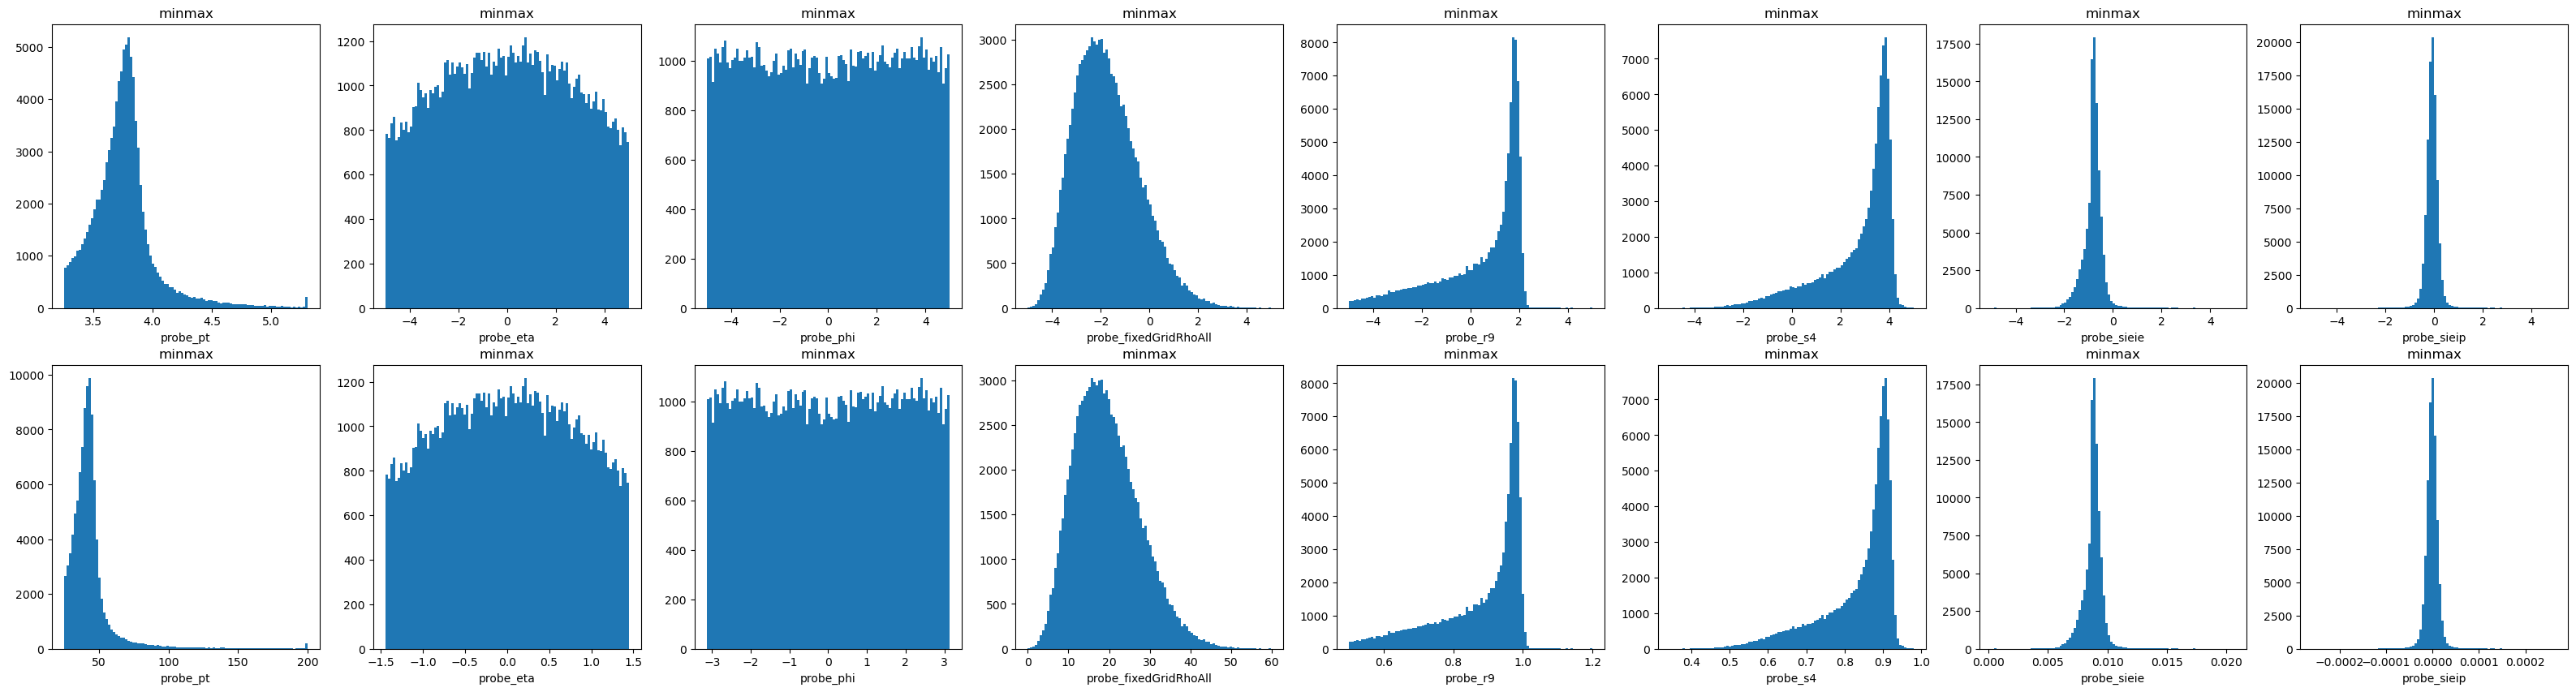

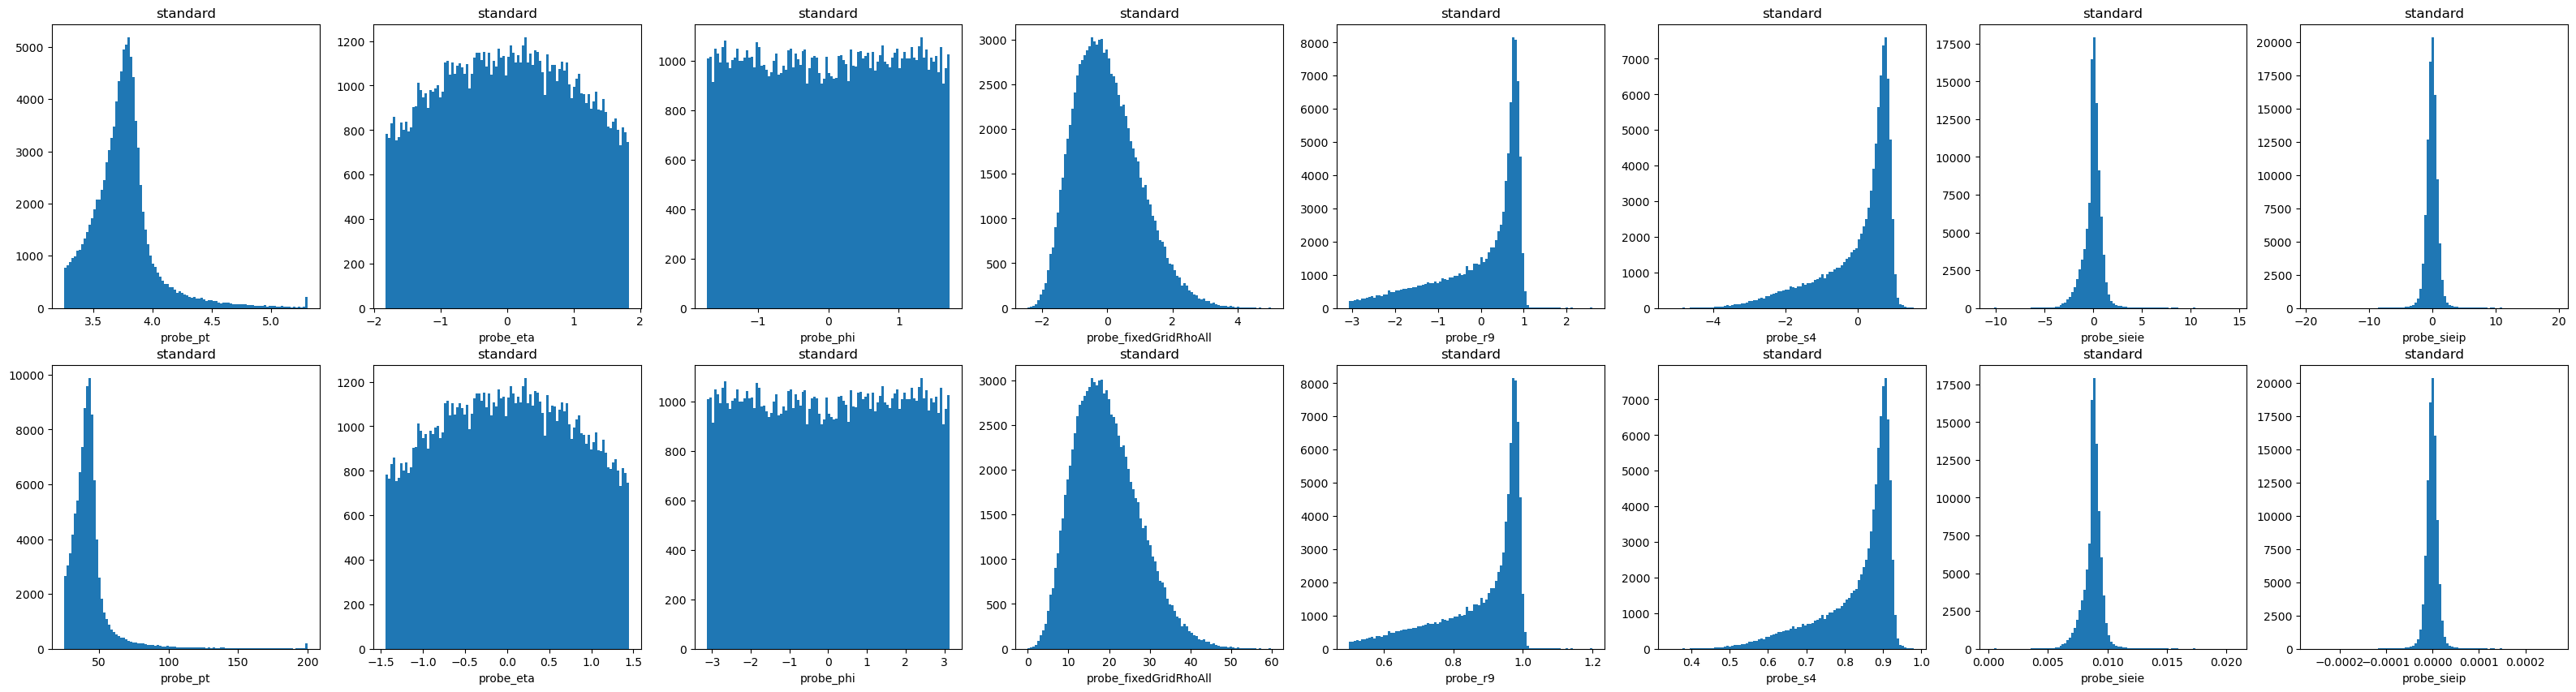

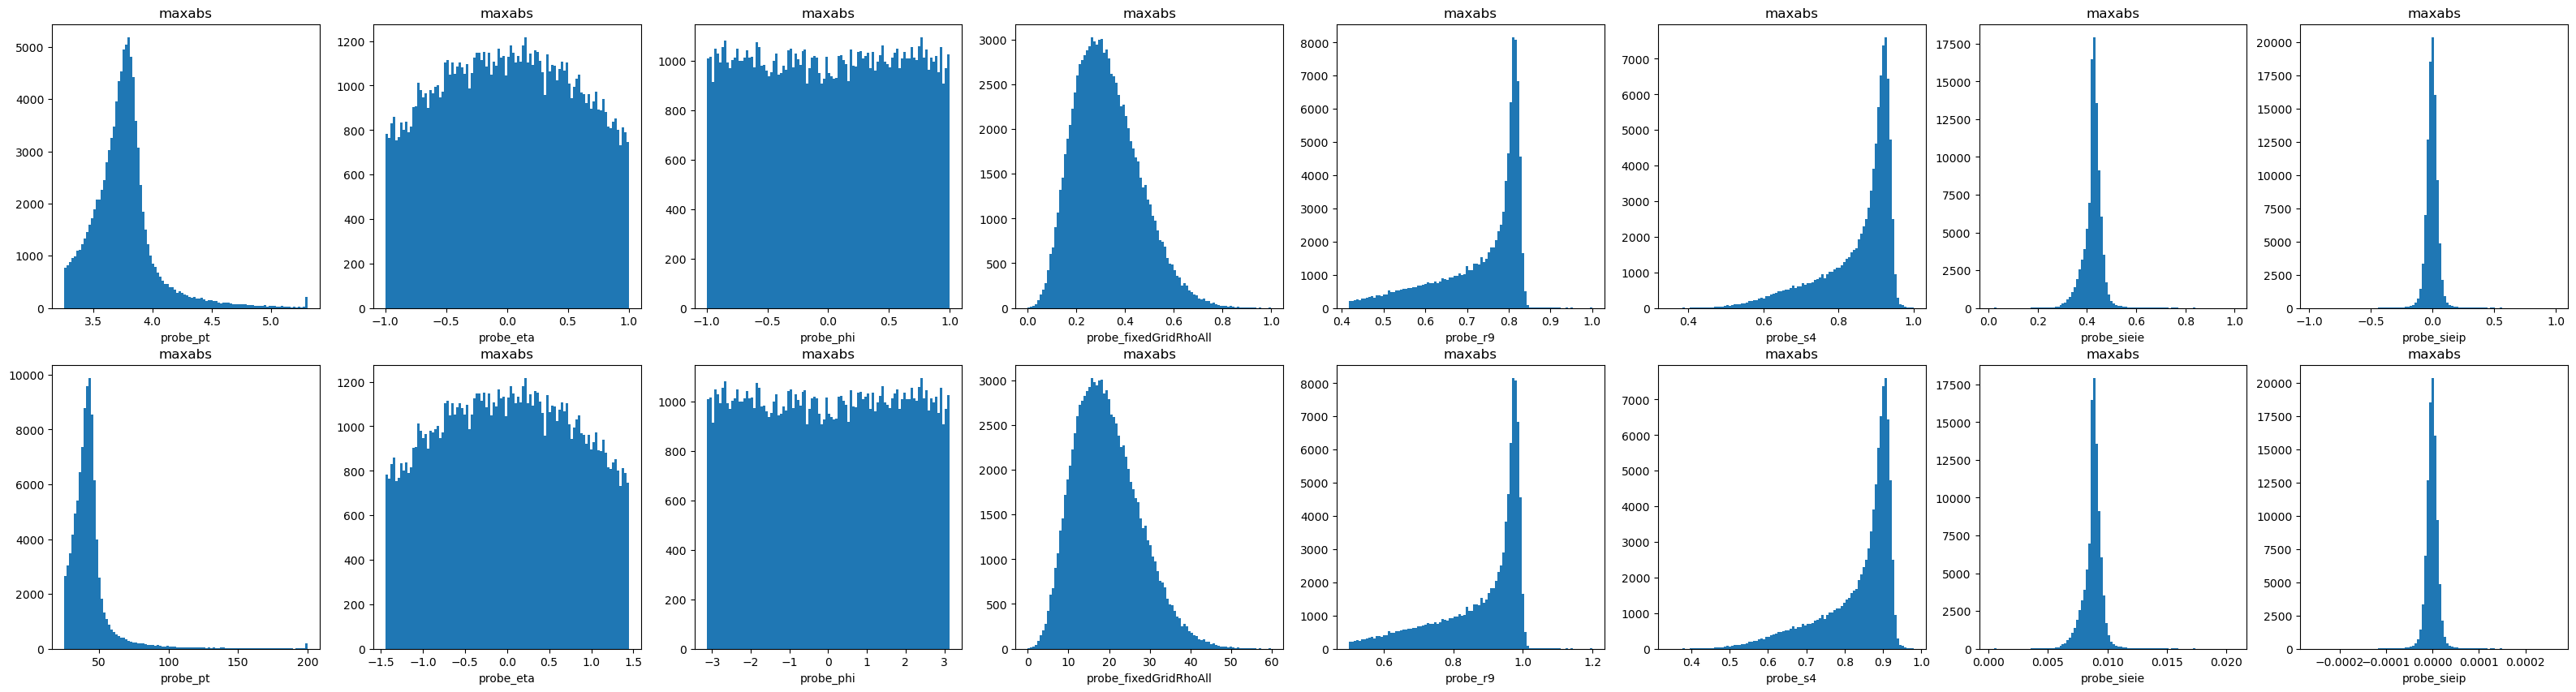

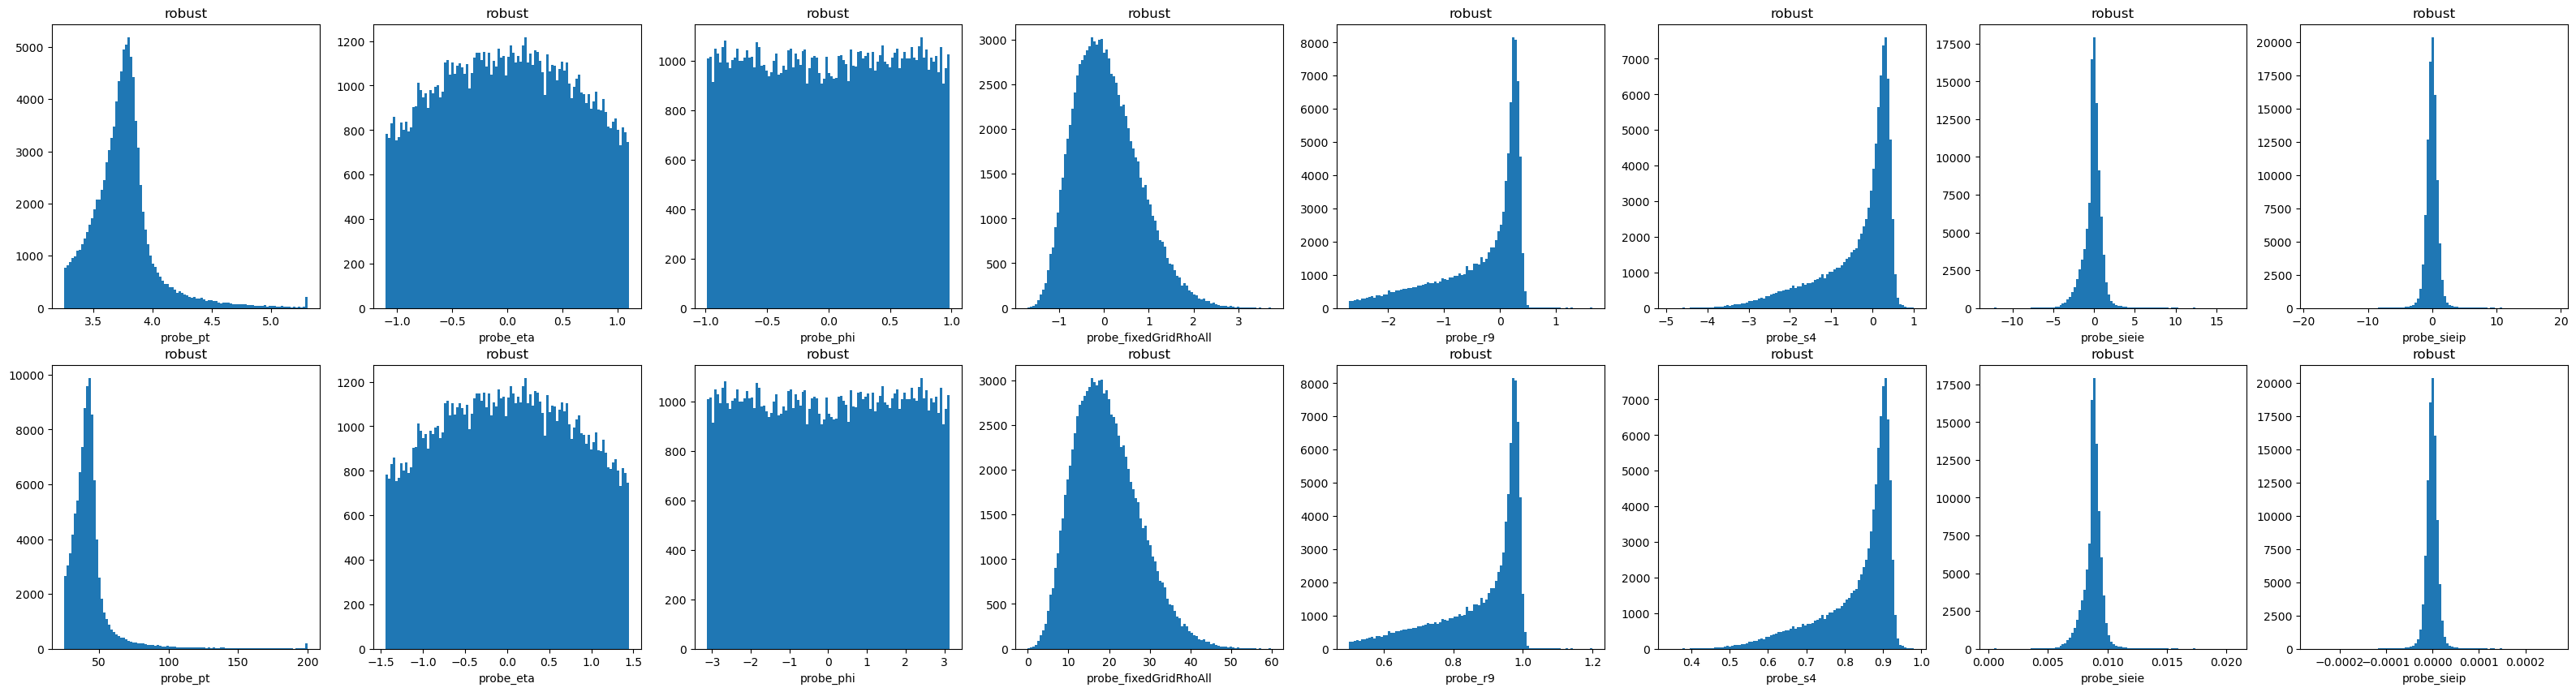

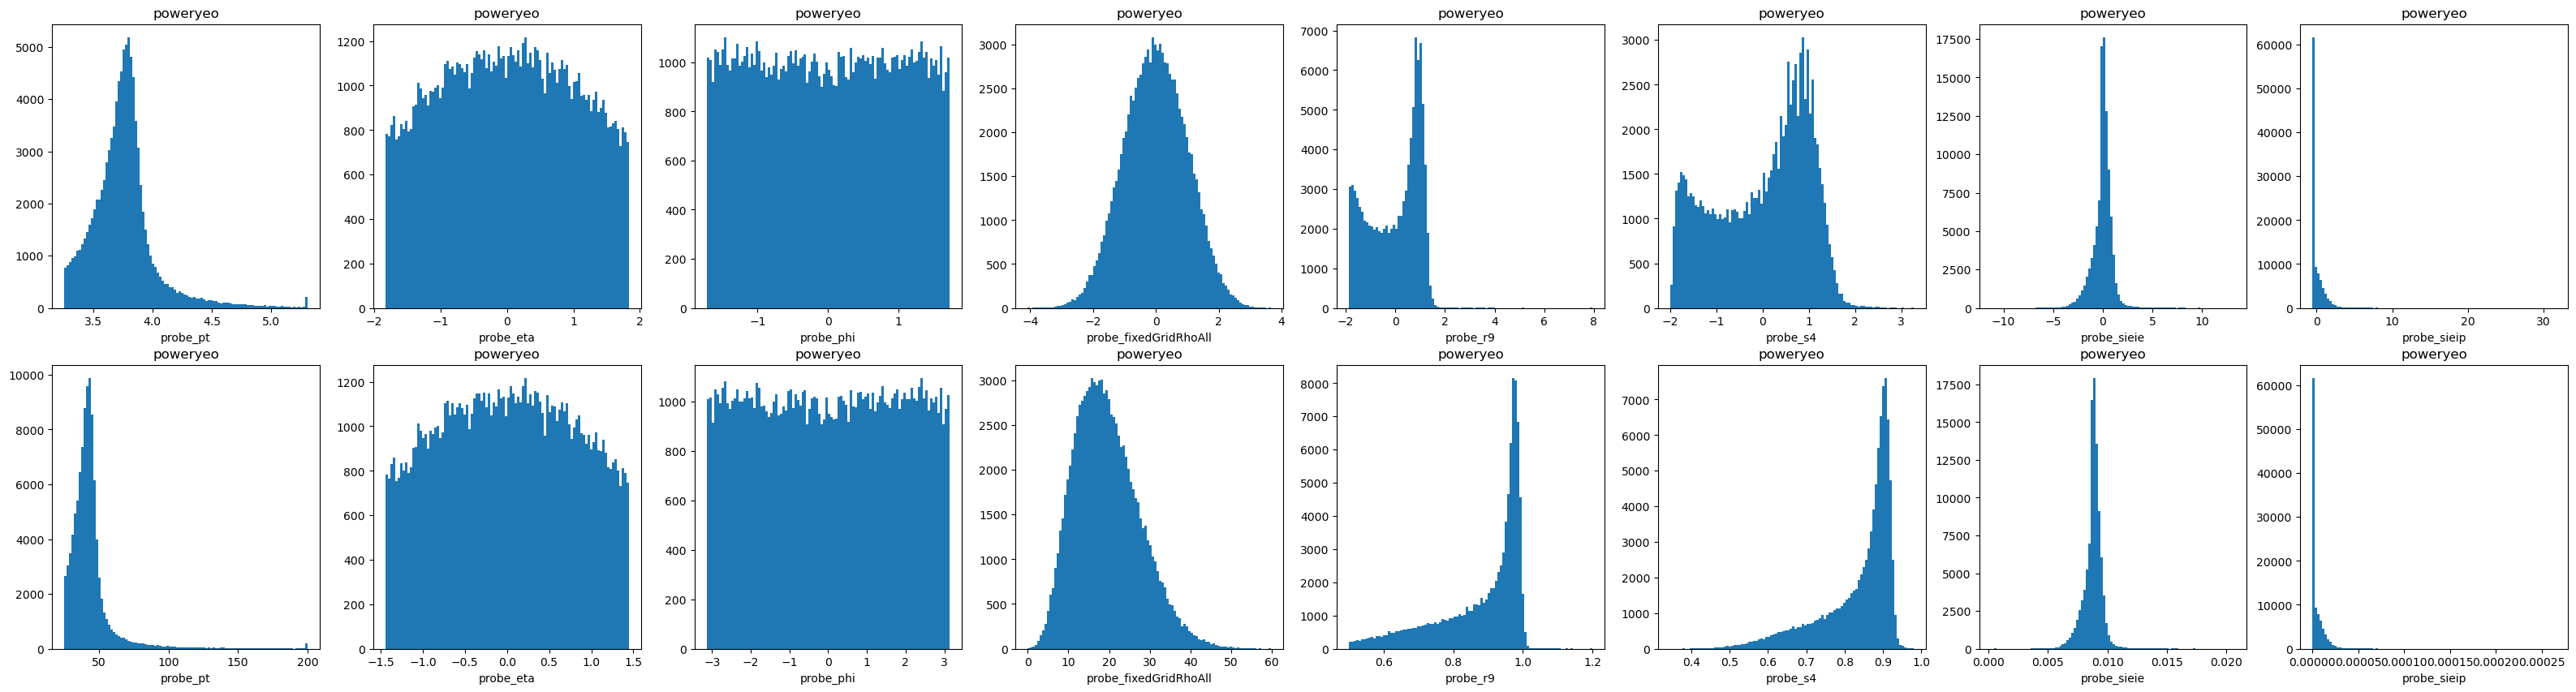

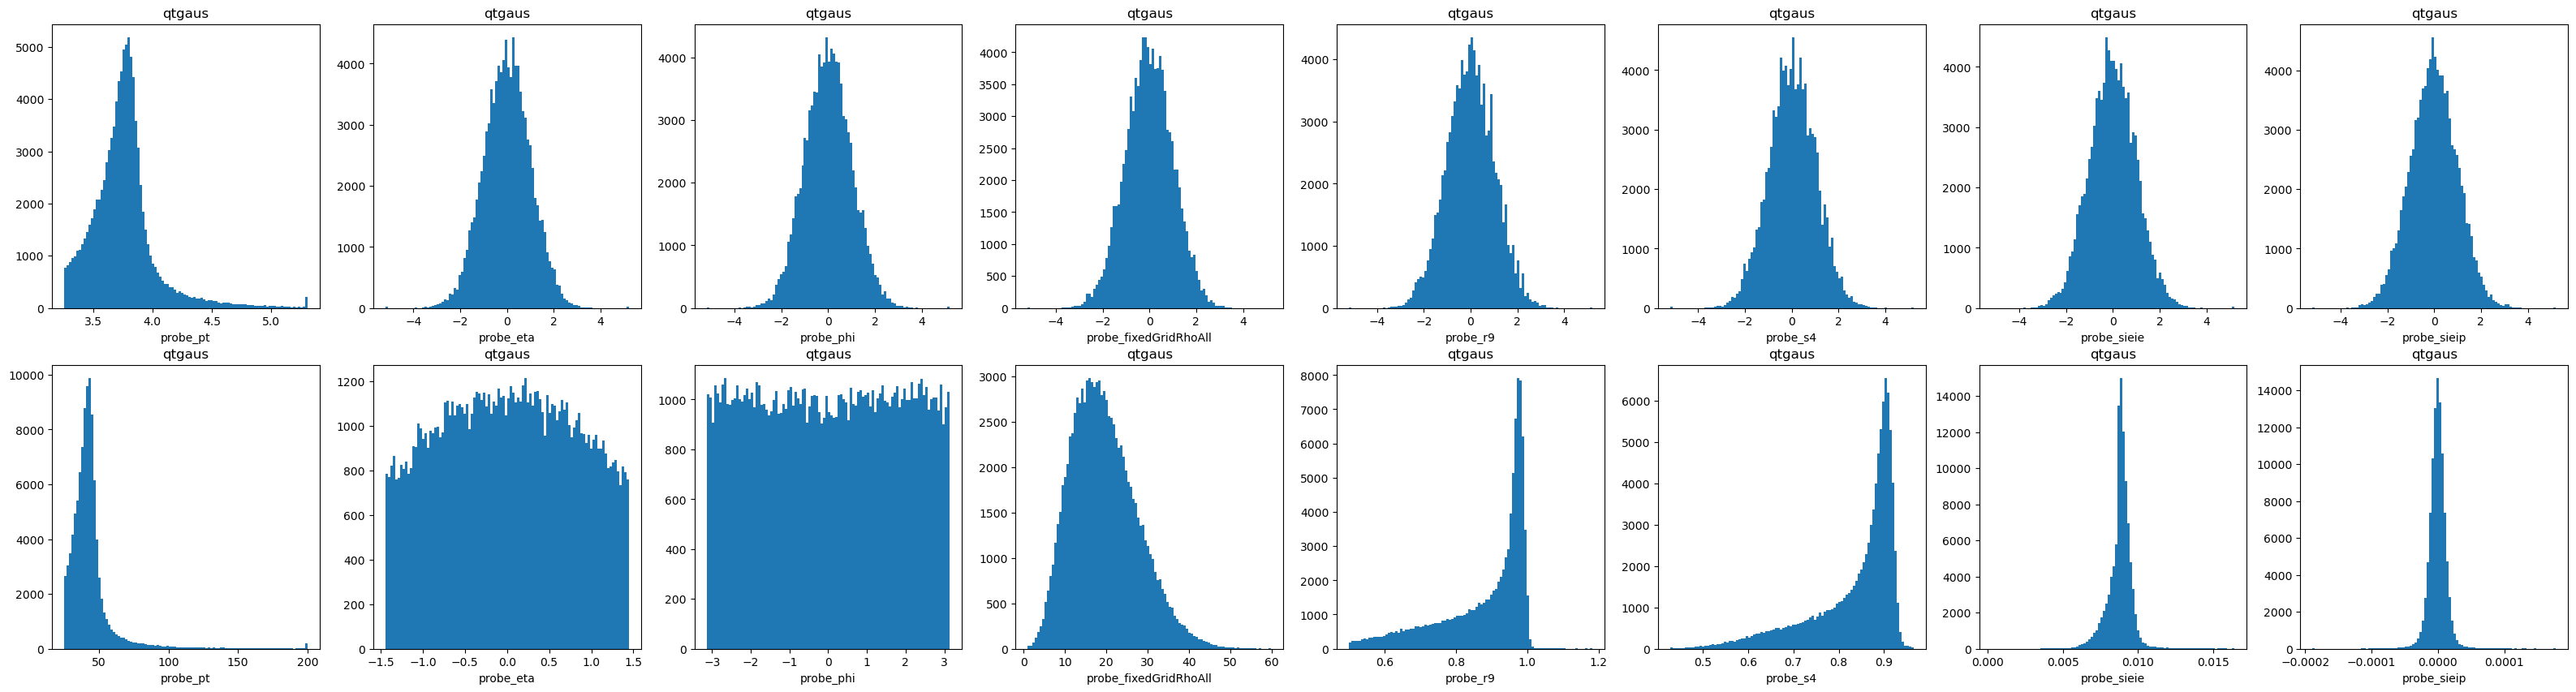

In [5]:
for i, scaler in enumerate(scalers):
    fig, axs = plt.subplots(2, len(all_columns), figsize=(5*len(all_columns), 10))
    dataset = ParquetDataset(files=fl, columns=all_columns, nevs=nevs, scaler=scaler)
    for j, col in enumerate(all_columns):
        axs[0, j].hist(dataset.df[col], bins=100)
        axs[0, j].set_xlabel(col)
        axs[0, j].set_title(scaler)
    dataset.scale_back()
    for j, col in enumerate(all_columns):
        axs[1, j].hist(dataset.df[col], bins=100)
        axs[1, j].set_xlabel(col)
        axs[1, j].set_title(scaler)
    plt.show()